## Jonathan Perkins
## PH 418
## Homework 5
## 4/4/2024

# PCA Clustering of Handwritten Digits from the MNIST Dataset

# MNIST database

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits. It is widely used for training and testing in machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

**Note:** Do not confuse the MNIST databse with the sklearn.datasets.load_digits, which contains only 1797 samples of 8x8 images.

# Imports

In [35]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import time

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Preprocessing

In [3]:
#Load the files:
t1=time.time()

X = np.loadtxt('4_MNIST_X.dat')
y = np.loadtxt('4_MNIST_y.dat')
y=y.astype(int)

t2=time.time()
print('Time for loading the MNIST dataset (secs):', t2-t1)

Time for loading the MNIST dataset (secs): 7.846298933029175


In [4]:
print(X.shape, '\n', y.shape, '\n')
print(y[0:10])

(70000, 784) 
 (70000,) 

[5 0 4 1 9 2 1 3 1 4]


In [10]:
# Rescaling X matrix features
X_scaled = StandardScaler().fit_transform(X)

# PCA

In [11]:
model = PCA(n_components = 2) # Finding two prinipal components
model.fit(X_scaled)
X_pca = model.transform(X_scaled)

print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (70000, 784)
Reduced shape: (70000, 2)


Text(0, 0.5, 'Second principal component')

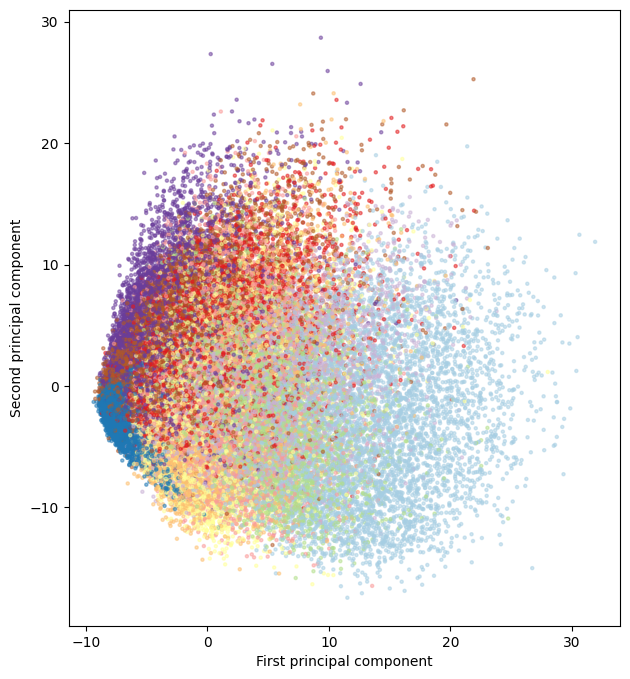

In [37]:
# plot first vs. second principal component, colored by class
cmap = cm.Paired

plt.figure(figsize=(8, 8))
plt.gca().set_aspect("equal")

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=cmap, s=5, alpha=0.5)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [38]:
print("PCA component shape: {}\n".format(model.components_.shape))

print("PCA components:\n{}".format(model.components_))

PCA component shape: (2, 784)

PCA components:
[[ 4.70282521e-17 -3.16466878e-19 -1.11395351e-18 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 5.03022124e-17 -5.61753742e-18 -2.14767549e-17 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


Text(0, 0.5, 'Principal components')

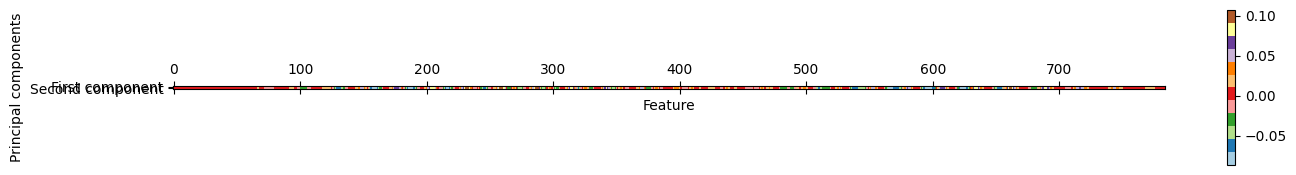

In [39]:
# Visualize the coefficients using a heat map:
plt.matshow(model.components_, cmap=cmap)
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
#plt.xticks(range(10), y, rotation=60)
plt.xlabel("Feature")
plt.ylabel("Principal components")

# K-Means Clustering